In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
train_datagen=ImageDataGenerator(rescale=1.255,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True)
train_set=train_datagen.flow_from_directory('potatoleaf',target_size=(64,64),
                                           batch_size=32,
                                           class_mode='categorical')

Found 3251 images belonging to 3 classes.


In [4]:
test_datagen=ImageDataGenerator(rescale=1.255)
test_set=train_datagen.flow_from_directory('test',target_size=(64,64),
                                           batch_size=32,
                                           class_mode='categorical')

Found 85 images belonging to 3 classes.


In [12]:
model=Sequential()

In [13]:
model.add(Conv2D(64,(3,3),activation='relu',input_shape=[64,64,3]))
model.add(MaxPool2D(2,2))


In [14]:
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))


In [15]:
model.add(Dropout(0.5))
model.add(Flatten())

In [16]:
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(64,activation='relu'))

In [17]:
model.add(Dense(3,activation='softmax'))

In [18]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 62, 62, 64)        1792      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 29, 29, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 128)      0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 12, 12, 128)       147584    
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 6, 6, 128)       

In [23]:
history=model.fit(x=train_set,validation_data=test_set,epochs=20)

Epoch 1/20
102/102 [==============================] - 14s 140ms/step - loss: 0.5954 - accuracy: 0.7075 - val_loss: 0.7739 - val_accuracy: 0.5412
Epoch 2/20
102/102 [==============================] - 16s 161ms/step - loss: 0.5691 - accuracy: 0.7222 - val_loss: 0.7122 - val_accuracy: 0.5882
Epoch 3/20
102/102 [==============================] - 16s 156ms/step - loss: 0.5532 - accuracy: 0.7225 - val_loss: 0.6936 - val_accuracy: 0.6588
Epoch 4/20
102/102 [==============================] - 16s 155ms/step - loss: 0.5598 - accuracy: 0.7398 - val_loss: 0.7137 - val_accuracy: 0.6824
Epoch 5/20
102/102 [==============================] - 17s 165ms/step - loss: 0.5285 - accuracy: 0.7416 - val_loss: 0.7356 - val_accuracy: 0.6824
Epoch 6/20
102/102 [==============================] - 16s 154ms/step - loss: 0.5244 - accuracy: 0.7647 - val_loss: 0.7327 - val_accuracy: 0.6118
Epoch 7/20
102/102 [==============================] - 16s 160ms/step - loss: 0.5039 - accuracy: 0.7758 - val_loss: 0.8089 - val_ac

In [24]:
model.save('pt.h5')

In [25]:
scores=model.evaluate(test_set)

3/3 [==============================] - 0s 73ms/step - loss: 0.5177 - accuracy: 0.7765


In [26]:
scores

[0.517716109752655, 0.7764706015586853]

In [27]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 102}

In [28]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation loss')

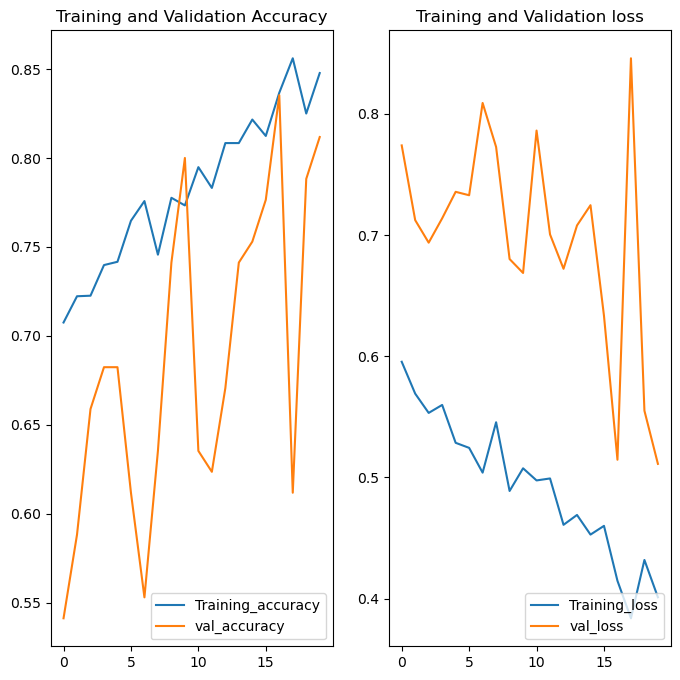

In [30]:
epochs=20
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(epochs),acc,label='Training_accuracy')
plt.plot(range(epochs),val_acc,label='val_accuracy')
plt.legend(loc='lower right')
plt.title("Training and Validation Accuracy")


plt.subplot(1,2,2)
plt.plot(range(epochs),loss,label='Training_loss')
plt.plot(range(epochs),val_loss,label='val_loss')
plt.legend(loc='lower right')
plt.title("Training and Validation loss")






In [6]:
model=load_model('pt.h5')

In [31]:
from tensorflow.keras.preprocessing import image
test_image=image.load_img('/media/revanth/Data/flask/FlaskApp/static/static_images/late_blight.JPG',target_size=(64,64))
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
result=model.predict(test_image)
train_set.class_indices


1/1 [==============================] - 0s 18ms/step


{'Early_Blight': 0, 'Healthy': 1, 'Late_Blight': 2}

In [32]:
result

array([[1.0126494e-01, 6.7318993e-04, 8.9806187e-01]], dtype=float32)

In [33]:
a=np.argmax(result)

In [34]:
a

2

In [35]:
if a==0:
    print("Early_bloght")
if a==1:
    print("healty")
else:
    print("Late blight")

Late blight
